# Historical Donor Data Analysis 

Where had this nonprofit's fundraising programming has gone well, and where there was room for improvement.  

**Who**
All individual donors who gave to the c3 recorded in NGP, minus monthly donors. We have  
We’re working with 7,392 donors in this analysis.

**Approach**
This is what I would call an “exploratory data analysis.” My goal here was to simply understand or donor data and start asking questions. Like every good analysis, I wound up with more questions than I was able to answer.   

**I started my analysis by asking the questions:**  
How many of our donors give below \\$100? Below \\$500? Below \\$1,000?  
What’s the average lifetime value of our donors?  
How many of our donors give once and then never again?  
Who loves us the most (donors with the most gifts)?  


In [1]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in the data for the c4 and the c3
c3 = pd.read_csv("data/all_c3_donors.Csv")
c4 = pd.read_csv("data/all_c4_donors.csv")

# c3 Donors
## The Data

In [3]:
# Let's make the donors anonymous 
c3_small = c3.iloc[:,[2,3,11]]
c3_small.columns = ['date', 'amount', 'name']
c3_small["name"] = c3_small["name"].astype('category').cat.codes
c3_small.head(10)

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,amount,name
0,06/15/2013,25.0,1900
1,07/08/2011,2000.0,4112
2,09/03/2013,25.0,4182
3,10/11/2013,100.0,1966
4,09/03/2013,25.0,1973
5,09/03/2013,10.0,2004
6,09/13/2013,1.0,2028
7,05/15/2014,10.0,2145
8,08/26/2014,10.0,2145
9,09/02/2013,5.0,4367


In [4]:
# What are the lifetime amounts of our top donors?
donors_by_lifetime = c3_small.groupby(['name'])['amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
name,
4421,301000.0
673,50000.0
5780,50000.0
6974,35500.0
813,35000.0
6980,35000.0
3537,30555.0
1456,26100.0
6093,25000.0


## Distribution of lifetime amount  1 to 100

In [5]:
sub_100 = donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] <= 100]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


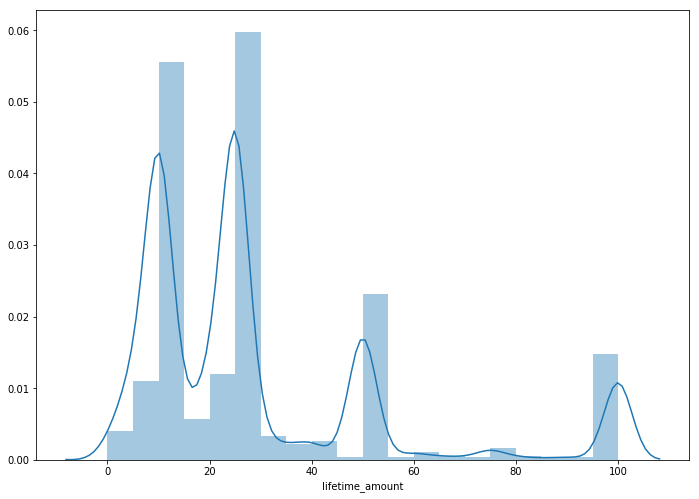

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(sub_100['lifetime_amount'], bins = 20)

## Removing the One Time Indiegogo Folk

25% of our donors have a lifetime amount of $25. We know that this nonprofit had a one-time global kickstarter campaign that racked up tons of one-time small-dollar gifts. We should absolutely filter these folk out of our analysis.  

Let's find the source code that corresponds to these folk.

In [7]:
donors_by_lifetime.loc[donors_by_lifetime["lifetime_amount"] == 25].count()/len(donors_by_lifetime)

lifetime_amount    0.255166
dtype: float64

In [18]:
c3_clean = c3
c3_clean[" Contact Name"] = c3_clean[" Contact Name"].astype('category').cat.codes
c3_clean = c3_clean.set_index(" Contact Name")


In [19]:
c3_clean["Received On"] = pd.to_datetime(c3_clean["Received On"])
c3_clean.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
1901,NaN,VNW16CXS6W4,2013-06-15,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673
4113,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
4183,NaN,VNW16CGENE0,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH1BC4
1967,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
1974,NaN,VNW16CGBAE5,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGGZJ57


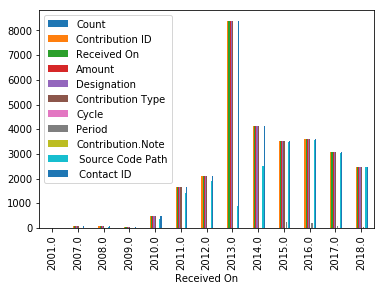

In [10]:
c3_clean.groupby(c3_clean["Received On"].dt.year).count().plot(kind="bar")


In [11]:
import datetime
datetime.datetime.strptime


<function datetime.strptime>

In [13]:
donors_2013 = c3_clean[c3_clean['Received On'].apply(lambda x: x.year == 2013)]
donors_2013.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
1900,NaN,VNW16CXS6W4,2013-06-15,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673
4182,NaN,VNW16CGENE0,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH1BC4
1966,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
1973,NaN,VNW16CGBAE5,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGGZJ57
2004,NaN,VNW16CGB8W0,2013-09-03,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH0TA2


Bingo. The crowdfunding campaign occured in September of 2013.

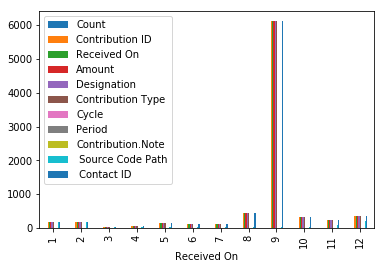

In [14]:
donors_2013.groupby(donors_2013["Received On"].dt.month).count().plot(kind="bar")


There were a whopping 6,125 donors during the Indiegogo campaign!

In [20]:
len(donors_2013[donors_2013['Received On'].apply(lambda x: x.month == 9)])

6128

In [21]:
indiegogo = c3_clean[c3_clean['Received On'].apply(lambda x: x.month == 9)]
indiegogo.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
4183,NaN,VNW16CGENE0,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH1BC4
1974,NaN,VNW16CGBAE5,2013-09-03,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGGZJ57
2005,NaN,VNW16CGB8W0,2013-09-03,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH0TA2
2029,NaN,VNW16CGK1G3,2013-09-13,1.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHHYX3
4368,NaN,VNW16CGB271,2013-09-02,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH02R2


In [87]:
c3_clean = pd.concat([c3_clean, indiegogo]).drop_duplicates(keep=False)
len(c3_clean)

21776

## Distirbution of Lifetime Amounts

In [88]:
donors_by_lifetime = c3_clean.groupby([' Contact Name'])['Amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
Contact Name,
4422,301000.0
5781,50000.0
6975,35500.0
814,35000.0
6981,35000.0
3538,30535.0
1457,26100.0
5907,25000.0
674,25000.0


In [90]:
donors_100_1000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 100) & (donors_by_lifetime["lifetime_amount"] <= 1000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


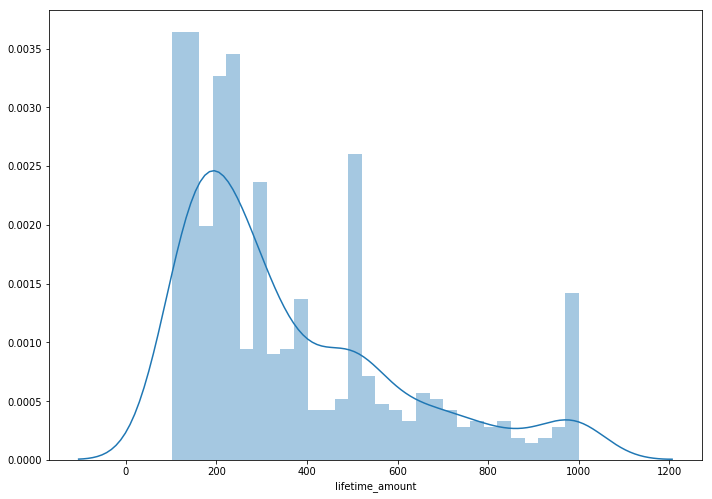

In [91]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_100_1000['lifetime_amount'], bins = 30)

In [97]:
donors_900_10000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 900) & (donors_by_lifetime["lifetime_amount"] <= 10000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


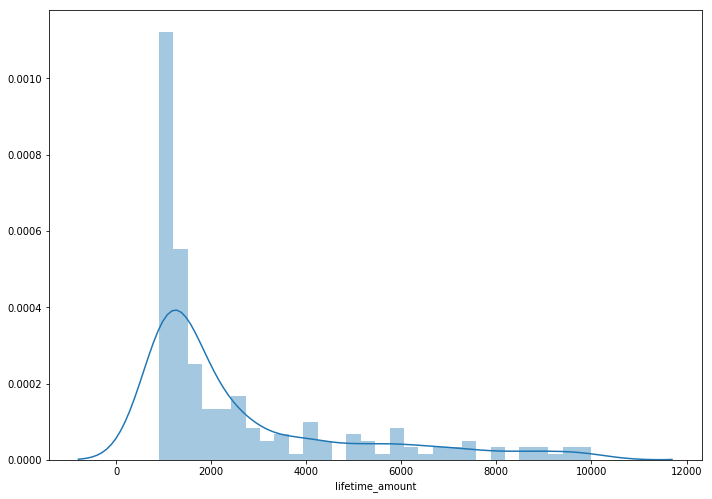

In [98]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_900_10000['lifetime_amount'], bins = 30)

## Quick Check on Lifetime Amounts  

8.8% of donors have a lifetime value of \\$1,000 or more. Given our definition of a major donor being someone who have given \\$1,000 or more, this means that 91% of our donors are small dollar donors.

In [104]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] == 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.011593
dtype: float64

In [105]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.087591
dtype: float64

## Removing monthly donors

In [116]:
c3_clean.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
1901,NaN,VNW16CXS6W4,2013-06-15,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673
4113,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
1967,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
2146,NaN,VNW16CXQK21,2014-05-15,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHNMY2
2146,NaN,VNW16CJZ9Z8,2014-08-26,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHNMY2


In [117]:
monthly_gifts = c3_clean[c3_clean[' Source Code Path'].str.contains("Player") == True]
monthly_gifts.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
3465,NaN,VNW16DPKJM1,2015-04-22,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGH3PA8
3465,NaN,VNW16EPKFM1,2016-08-15,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGH3PA8
3345,NaN,VNW16EPKCJ9,2016-08-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGHJ7D6
3904,NaN,VNW16E2V624,2015-11-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,Primary,NaN,c3 Donors/Player contribution,VNX0EGH8D82
3354,NaN,VNW16DM0RJ5,2015-02-15,5.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/Player contribution,VNX0EGJ17E3


In [118]:
no_monthly = pd.concat([c3_clean, monthly_gifts]).drop_duplicates(keep=False)
no_monthly.head(10)

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
Contact Name,,,,,,,,,,,
1901,NaN,VNW16CXS6W4,2013-06-15,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHM673
4113,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
1967,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
2146,NaN,VNW16CXQK21,2014-05-15,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHNMY2
2146,NaN,VNW16CJZ9Z8,2014-08-26,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHNMY2
4717,NaN,VNW16E3PPR3,2015-12-22,2500.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGJ1973
4643,NaN,VNW16CGND82,2010-04-27,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH8PJ0
4794,NaN,VNW16CGFH74,2008-02-07,21.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH3992
1933,NaN,VNW16CGDHA2,2007-03-21,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH2VW2


# Repeating the analysis, minus monthly members
## By Gift Count

In [122]:
no_monthly_by_gifts = no_monthly.groupby([' Contact Name']).size().sort_values(ascending = False).to_frame()
no_monthly_by_gifts.columns = ['number_of_gifts']
no_monthly_by_gifts.head(15)

,number_of_gifts
Contact Name,
3087,72
1823,70
7029,67
795,59
2766,52
1093,51
1628,51
3559,50
1488,49


## By Lifetime Value

In [123]:
no_monthly_by_lifetime = no_monthly.groupby([' Contact Name'])['Amount'].sum().sort_values(ascending = False).to_frame()
no_monthly_by_lifetime.columns = ['lifetime_amount']
no_monthly_by_lifetime.head(15)

,lifetime_amount
Contact Name,
4422,301000.0
5781,50000.0
6975,35500.0
814,35000.0
6981,35000.0
3538,30535.0
1457,26100.0
674,25000.0
6094,25000.0


In [125]:
### Summary Stats

In [124]:
len(no_monthly_by_gifts)

2142

In [126]:
np.mean(no_monthly_by_gifts)

number_of_gifts    4.60084
dtype: float64

In [127]:
np.mean(no_monthly["Amount"])

140.50402983559977

In [129]:
no_monthly["Amount"].median()

10.0

In [132]:
np.mean(no_monthly_by_lifetime["lifetime_amount"])

646.3710130718955

In [140]:
no_monthly_by_lifetime.median()

lifetime_amount    50.0
dtype: float64

In [133]:
max(no_monthly["Amount"])

100000.0

In [141]:
len(no_monthly_by_lifetime.loc[no_monthly_by_lifetime["lifetime_amount"] <= 50])/len(no_monthly_by_lifetime)

0.5163398692810458

We have **2,142 non monthly donors**.  
The average number of lifetime gifts is 4.6.  
The median lifetime amount is \\$50  
The average gift amount is \\$140  
The median gift amount is \\$10.0  
The average lifetime value of our donors is \\$646.37.   
The highest gift we ever received was for \\$100,000!  
**51.6% of donors have a lifetime value of \\$50 or below.**

In [138]:
no_monthly_by_lifetime.describe()

,lifetime_amount
count,2142.000000
mean,646.371013
std,6970.361985
min,0.000000
25%,25.000000
50%,50.000000
75%,200.000000
max,301000.000000


## Repeat Donors (non monthly)

In [155]:
no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] == 1].count()

number_of_gifts    1316
dtype: int64

In [143]:
no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] == 1].count()/len(no_monthly_by_gifts)

number_of_gifts    0.614379
dtype: float64

61.4% of New Era's donors only give once!

In [144]:
repeat_donors = no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] != 1]

In [145]:
repeat_donors.head(10)

,number_of_gifts
Contact Name,
3087,72
1823,70
7029,67
795,59
2766,52
1093,51
1628,51
3559,50
1488,49


/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


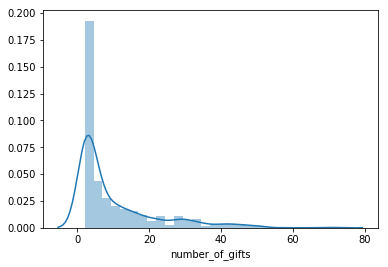

In [146]:
sns.distplot(repeat_donors['number_of_gifts'])

In [149]:
repeat_donors_zoom = no_monthly_by_gifts.loc[(no_monthly_by_gifts['number_of_gifts'] > 1) & (no_monthly_by_gifts['number_of_gifts'] < 50)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


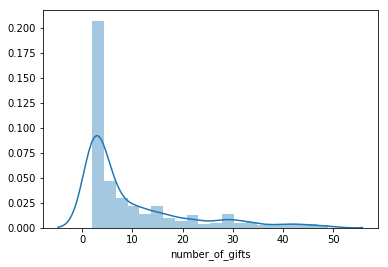

In [150]:
sns.distplot(repeat_donors_zoom['number_of_gifts'])

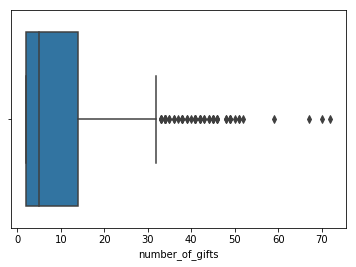

In [151]:
ax = sns.boxplot(x=repeat_donors["number_of_gifts"])

In [152]:
repeat_donors.describe()

,number_of_gifts
count,826.000000
mean,10.337772
std,11.933795
min,2.000000
25%,2.000000
50%,5.000000
75%,14.000000
max,72.000000


In [153]:
repeat_donors.median()

number_of_gifts    5.0
dtype: float64

In [154]:
no_monthly_by_gifts.loc[no_monthly_by_gifts['number_of_gifts'] == 2].count()/901

number_of_gifts    0.257492
dtype: float64

In [ ]:
no_monthly_by_gifts.loc[(no_monthly_by_gifts['number_of_gifts'] < 5) & (no_monthly_by_gifts['number_of_gifts'] > 1)].count()/901

New Era has 826 donors that have given more than 1 gift (compared to 1,316 that have only given once).